In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
inspector = inspect(engine)
inspector.get_table_names()
Base = automap_base()
Base.prepare(engine, reflect=True)






In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.

# found help at https://stackoverflow.com/questions/45775724/sqlalchemy-group-by-and-return-max-date/45779686
date = session.query(func.max(Measurement.date)).first()
date[0]





'2017-08-23'

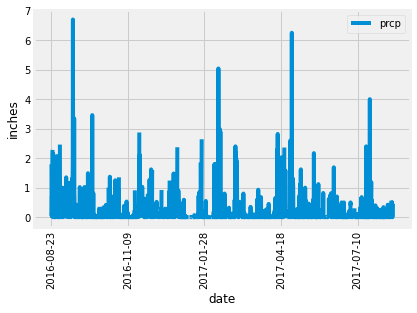

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
measurement1= session.query(Measurement)
prcp = session.query(Measurement.prcp).all()
prcp

# Calculate the date one year from the last date in data set.
#found at https://stackoverflow.com/questions/55183235/get-the-one-year-before-date-for-a-given-date-in-python
import datetime
year_ago =(datetime.datetime.strptime(date[0], '%Y-%m-%d') - datetime.timedelta(days=365)).strftime('%Y-%m-%d')



# session.query.order_by(desc(Measurement.date)).limit(1)

# Perform a query to retrieve the data and precipitation scores
prcp_one_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date.between(year_ago,date[0])).all()
prcp_one_year
# Save the query results as a Pandas DataFrame and set the index to the date column

#  from https://www.geeksforgeeks.org/creating-a-pandas-dataframe-using-list-of-tuples/
prcp_one_year_df = pd.DataFrame.from_records(prcp_one_year, columns =['date', 'prcp'])
prcp_one_year_df = prcp_one_year_df.set_index('date')

prcp_one_year_df = prcp_one_year_df.sort_values('date')
# prcp_one_year_df
# Use Pandas Plotting with Matplotlib to plot the data
# used reset index so that it is not the index anymore and can be used to plot
# https://stackoverflow.com/questions/20084487/use-index-in-pandas-to-plot-data/20084590
prcp_one_year_df.reset_index().plot(x='date', y='prcp', ylabel="inches", rot=90);



In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_one_year_df.summary()

AttributeError: 'DataFrame' object has no attribute 'summary'

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()